In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pathlib import Path
%matplotlib inline

from scipy import stats

from sklearn.metrics import confusion_matrix

## Parameters

In [42]:
TAG = ''
timestamp = '03-25-14:27'

## Confusion Matrices

In [26]:
predictions_path = f'Predictions_{TAG}_{timestamp}.csv'

In [30]:
preds = pd.read_csv(predictions_path, header=None)

In [31]:
true0 = preds.iloc[0][2:].to_numpy()
true1 = preds.iloc[6][2:].to_numpy()
true2 = preds.iloc[12][2:].to_numpy()

n0 = preds.iloc[5][2:].to_numpy()
n1 = preds.iloc[11][2:].to_numpy()
n2 = preds.iloc[17][2:].to_numpy()

In [32]:
confusion_matrix(np.concatenate((true0,true1,true2)), np.concatenate((n0,n1,n2)))

array([[105,  15,   4,   2,  21,   5,   4],
       [  5, 142,   2,   0,   0,   0,   7],
       [  5,   6,  55,  70,   7,  10,   3],
       [  4,   3,  70,  40,  31,   5,   3],
       [ 18,   5,   8,  14,  97,   8,   6],
       [ 10,   3,   5,   7,   5,  79,  47],
       [  3,   6,   3,   6,   5,  45,  88]])

## Plots

In [38]:
## Colors
names = {"RF":"#f86000", "TORF":"red", "MORF": "orange"}

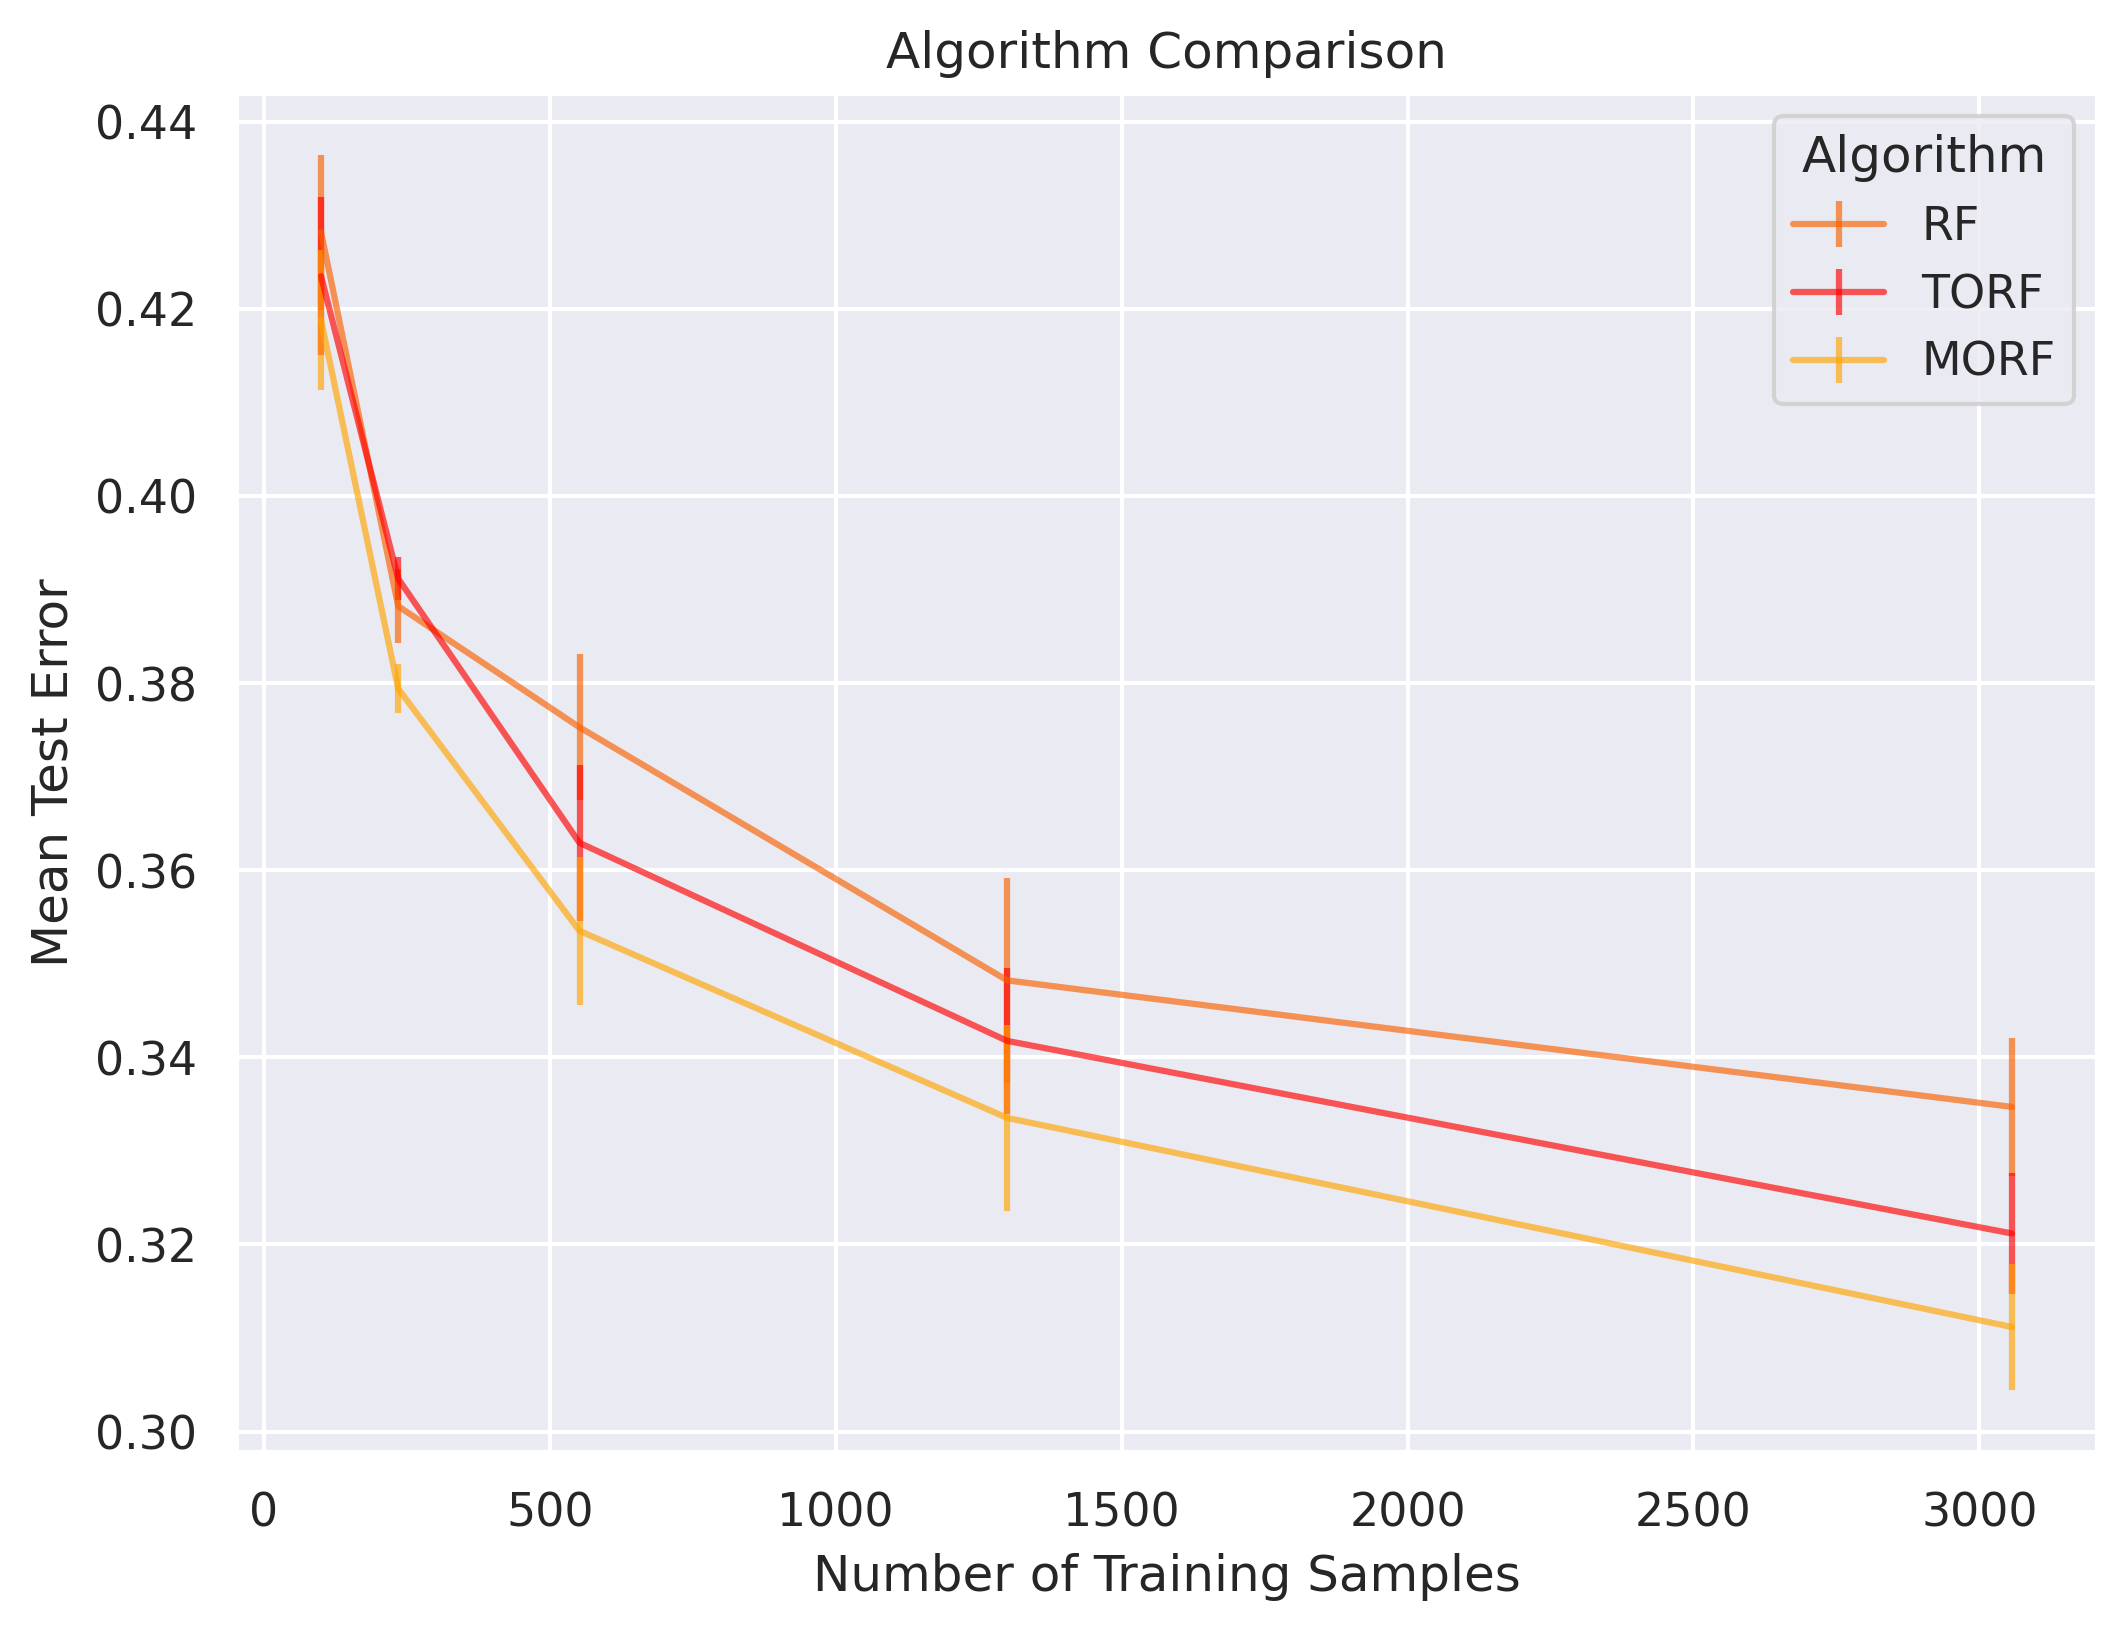

In [43]:
dat = pd.read_csv(f"EEG_classifier_results_{TAG}_{timestamp}.csv")

d1 = pd.DataFrame(columns = ['classifier', 'n', 'Lhat', 'se', 'color'])

k = 0
for ni in np.unique(dat['n']):
    for cl in np.unique(dat['classifier']):

        tmp = dat[np.logical_and(dat['classifier'] == cl,dat['n'] == ni)][['n', 'Lhat']]
        
        se = stats.sem(tmp['Lhat'])

        list(tmp.mean())
        d1.loc[k] = [cl] + list(tmp.mean()) + [se] + [names[cl]]
        k += 1


sns.set(style="darkgrid", rc={'figure.figsize':[12,8], 'figure.dpi': 300})
fig, ax = plt.subplots(figsize = (8,6))

for key in names.keys():
    grp = d1[d1['classifier'] == key]
    ax = grp.plot(ax=ax, kind='line', x='n', y='Lhat', label=key, \
            c = names[key], yerr='se', alpha =0.65)
    #ax.set_yscale('log')

plt.legend(loc='best',title='Algorithm')
plt.title('Algorithm Comparison')
plt.ylabel('Mean Test Error')
plt.xlabel('Number of Training Samples')
#plt.savefig('./s-rerf_impulse_experiment.pdf',dpi=300,format='pdf')
plt.show()